# Feature Extraction Techniques From Raw Image

# Importing the libraries


In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Importing the image


In [77]:
image = cv2.imread("./bird.jpg")  # The image is in BGR format

# Convertion of BGR to RGB


In [78]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualizing the RGB image


(-0.5, 639.5, 680.5, -0.5)

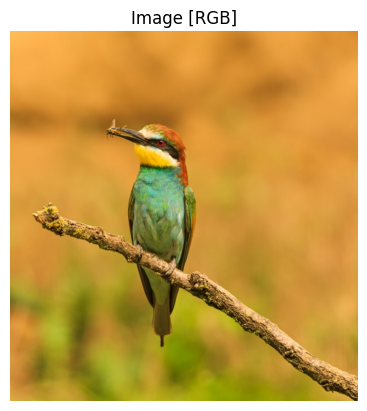

In [79]:
plt.imshow(image_rgb)
plt.title("Image [RGB]")
plt.axis("off")

# Color-based Features

Color-based feature extraction techniques leverage the color information within an image to derive meaningful features. These techniques are widely used in image processing, computer vision, and pattern recognition.


## Color Histograms

One of the most commonly used methods for representing the color distribution in an image is through color histograms. A color histogram quantifies the frequency of occurrence of different color values or bins in an image. By dividing the color space into discrete intervals or bins, such as RGB (Red, Green, Blue) or HSV (Hue, Saturation, Value), a histogram captures the distribution of colors across the image.


### Calculation the Histogram for each channel


In [80]:
# Calculates histograms for each channel
hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256]).flatten()
hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256]).flatten()
hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256]).flatten()

### Normalizing the Histograms

Normalization is important because it ensures that the histogram values are independent of the image size and total number of pixels. This allows for consistent comparison between histograms from different images, regardless of their dimensions. Normalized histograms provide a probability distribution of pixel intensities, which is useful in various image processing tasks, such as image comparison, feature extraction, and image recognition.


In [98]:
# Normalizes the histogram value
hist_r /= hist_r.sum()
hist_g /= hist_g.sum()
hist_b /= hist_b.sum()

### Visualizing the Histograms


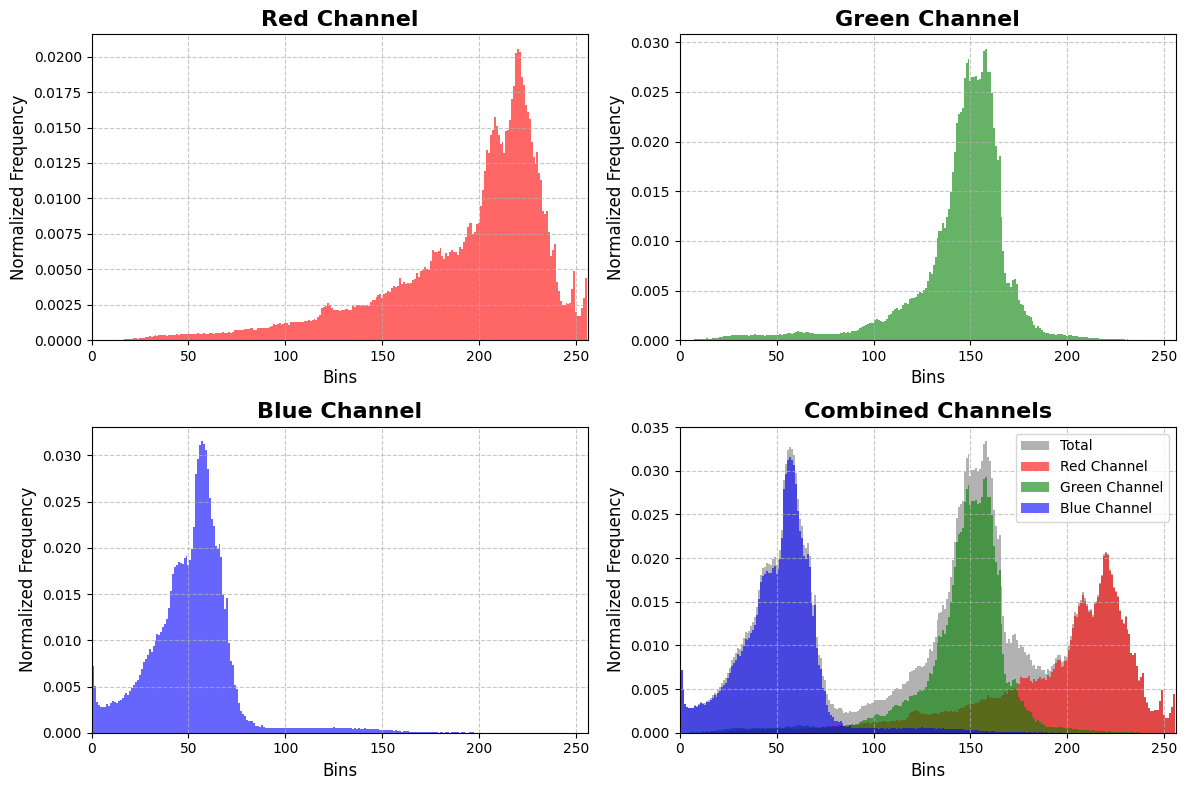

In [82]:
# Create a figure with two rows and two columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8), facecolor="white")
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot individual Red channel in the top-left subplot
axs[0, 0].bar(range(256), hist_r, color="r", width=1.0, alpha=0.6)
axs[0, 0].set_xlim([0, 256])
axs[0, 0].set_title("Red Channel", fontsize=16, fontweight="bold")
axs[0, 0].set_xlabel("Bins", fontsize=12)
axs[0, 0].set_ylabel("Normalized Frequency", fontsize=12)
axs[0, 0].grid(True, linestyle="--", alpha=0.7)

# Plot individual Green channel in the top-right subplot
axs[0, 1].bar(range(256), hist_g, color="g", width=1.0, alpha=0.6)
axs[0, 1].set_xlim([0, 256])
axs[0, 1].set_title("Green Channel", fontsize=16, fontweight="bold")
axs[0, 1].set_xlabel("Bins", fontsize=12)
axs[0, 1].set_ylabel("Normalized Frequency", fontsize=12)
axs[0, 1].grid(True, linestyle="--", alpha=0.7)

# Plot individual Blue channel in the bottom-left subplot
axs[1, 0].bar(range(256), hist_b, color="b", width=1.0, alpha=0.6)
axs[1, 0].set_xlim([0, 256])
axs[1, 0].set_title("Blue Channel", fontsize=16, fontweight="bold")
axs[1, 0].set_xlabel("Bins", fontsize=12)
axs[1, 0].set_ylabel("Normalized Frequency", fontsize=12)
axs[1, 0].grid(True, linestyle="--", alpha=0.7)

# Plot combined histogram in the bottom-right subplot
hist_total = hist_r + hist_g + hist_b
axs[1, 1].bar(range(256), hist_total, color="gray", width=1.0, alpha=0.6, label="Total")
axs[1, 1].bar(range(256), hist_r, color="r", width=1.0, alpha=0.6, label="Red Channel")
axs[1, 1].bar(
    range(256), hist_g, color="g", width=1.0, alpha=0.6, label="Green Channel"
)
axs[1, 1].bar(range(256), hist_b, color="b", width=1.0, alpha=0.6, label="Blue Channel")
axs[1, 1].set_xlim([0, 256])
axs[1, 1].set_title("Combined Channels", fontsize=16, fontweight="bold")
axs[1, 1].set_xlabel("Bins", fontsize=12)
axs[1, 1].set_ylabel("Normalized Frequency", fontsize=12)
axs[1, 1].legend(loc="upper right", fontsize=10)
axs[1, 1].grid(True, linestyle="--", alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

## Color Moments

Color moments are measures that can be used differentiate images based on their features of color. Once calculated, these moments provide a measurement for color similarity between images. The mean, standard deviation and skewness are commonly used color moments

- **Mean:** Mean can be understood as the average color value in the image.

  $$
  E_i = \frac{1}{N} \sum_{j=1}^{N} p_{ij}
  $$

- **Standard Deviation:** The standard deviation is the square root of the variance of the distribution.

  $$
  \sigma_i = \sqrt{(\frac{1}{N} \sum_{j=1}^{N} \left( p_{ij} - E_i \right)^2)}
  $$

- **Skewness:** Skewness can be understood as a measure of the degree of asymmetry in the distribution.
  $$
  s_i = \sqrt[3]{(\frac{1}{N} \sum_{j=1}^{N} \left( p_{ij} - E_i \right)^3)}
  $$


### Calculating the mean, variance and skewness for each channel


In [83]:
from scipy.stats import skew

# Splitting the channels
channels = cv2.split(image_rgb)
mean = []
std_deviation = []
skewness = []

# Calculating the mean, variance and skewness for each channel
for channel in channels:
    mean.append(np.mean(channel))
    std_deviation.append(np.std(channel))
    skewness.append(skew(channel.flatten()))

In [84]:
print("Mean:", mean)
print("Standard Deviation:", std_deviation)
print("Skewness:", skewness)

Mean: [193.35006194933922, 144.73415014684286, 50.65729396108664]
Standard Deviation: [42.22622533828454, 26.414928112645917, 22.913644242978894]
Skewness: [-1.393137198609348, -1.857558189713299, 0.8611079145556424]


# Texture Based Features

Texture analysis is an important part of image processing and computer vision that looks at how pixel intensities are arranged in an image. It helps in understanding the texture of an image, which is important for tasks like classifying, segmenting, and recognizing images, especially when the images have repeating patterns or complex structures.


## Converting the image into gray-scale image


In [100]:
# Converts the image to gray-scale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

## Visualizing the gray-scaled image


(-0.5, 639.5, 680.5, -0.5)

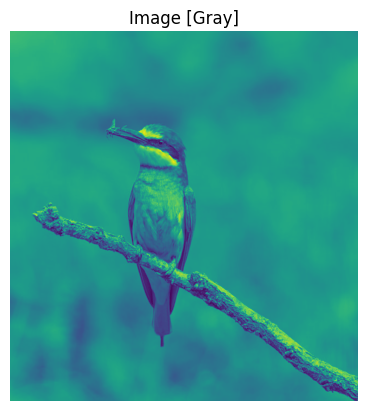

In [86]:
plt.imshow(image_gray)
plt.title("Image [Gray]")
plt.axis("off")

## Gray-Level Co-occurrence Matrix (GLCM)

The Gray Level Co-occurrence Matrix (GLCM) is a statistical method used to analyze the texture of an image by examining the spatial relationships between pixel intensities. Four important measures derived from the GLCM are Contrast, Correlation, Energy, and Homogeneity.

**Contrast:** Contrast measures the local variations in the GLCM, indicating how much the intensity of a pixel differs from its neighbors over the whole image.

$$
\text{Contrast} = \sum_{i,j} (i - j)^2 \cdot P(i, j)
$$

where $P(i, j)$ is the $(i, j)$-th entry in the normalized GLCM.

**Correlation:** Correlation measures the joint probability occurrence of specified pixel pairs, describing how correlated a pixel is to its neighbor over the entire image.

$$
\text{Correlation} = \frac{\sum_{i,j} (i - \mu_i)(j - \mu_j) \cdot P(i, j)}{\sigma_i \sigma_j}
$$

where $\mu_i$ and $\mu_j$ are the means, and $\sigma_i$ and $\sigma_j$ are the standard deviations of the GLCM.

**Energy:** Energy (also known as Angular Second Moment) measures the sum of squared elements in the GLCM. It represents the textural uniformity or pixel pair repetitions in an image.

$$
\text{Energy} = \sum_{i,j} P(i, j)^2
$$

**Homogeneity:** Homogeneity (also known as Inverse Difference Moment) measures the closeness of the distribution of elements in the GLCM to the GLCM diagonal, indicating how uniform the texture is.

$$
\text{Homogeneity} = \sum_{i,j} \frac{P(i, j)}{1 + |i - j|}
$$


### Calculating the co-occurrence matrix for the image


In [101]:
from skimage.feature import graycomatrix, graycoprops

glcm = graycomatrix(
    image_gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True
)

### Visualizing GLCM as heatmap


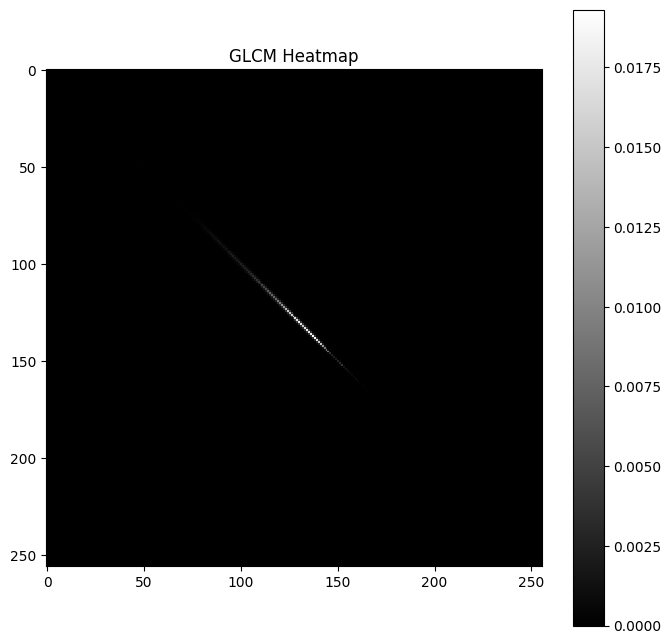

In [88]:
plt.figure(figsize=(8, 8))
plt.imshow(glcm[:, :, 0, 0], cmap="gray", interpolation="nearest")
plt.title("GLCM Heatmap")
plt.colorbar()
plt.show()

### Calculating the texture features from the co-occurrence matrix


In [89]:
contrast = graycoprops(glcm, "contrast")[0, 0]
homogeneity = graycoprops(glcm, "homogeneity")[0, 0]
energy = graycoprops(glcm, "energy")[0, 0]
correlation = graycoprops(glcm, "correlation")[0, 0]

### Printng the texture features


In [90]:
print("Contrast: {:.3f}".format(contrast))
print("Homogeneity: {:.3f}".format(homogeneity))
print("Energy: {:.3f}".format(energy))
print("Correlation: {:.3f}".format(correlation))

Contrast: 50.850
Homogeneity: 0.699
Energy: 0.086
Correlation: 0.958


## Local Binary Patterns (LBP)

LBP is a straightforward but effective technique for describing texture. It works by comparing the intensity of each pixel in an image with the intensities of its neighboring pixels. A binary code is assigned based on whether each neighbor's intensity is higher or lower than that of the central pixel. This binary coding captures the texture details of the image. LBP is known for its robustness against illumination variations and its computational efficiency, making it ideal for real-time tasks like face recognition, texture analysis, and object detection.


### Calculating the LBP


In [91]:
from skimage.feature import local_binary_pattern

lbp = local_binary_pattern(image_gray, P=8, R=1, method="uniform")

### Visualizing the LBP transformation of the image


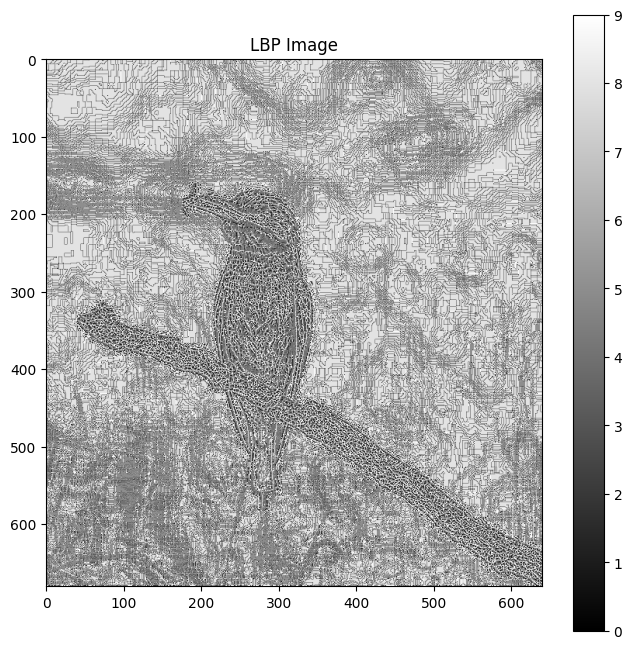

In [92]:
plt.figure(figsize=(8, 8))
plt.imshow(lbp, cmap="gray")
plt.title("LBP Image")
plt.colorbar()
plt.show()

### Calculating the Histogram of LBP features


In [95]:
hist_lbp, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
hist_lbp = hist_lbp.astype("float")
hist_lbp /= hist_lbp.sum()

### Printing the calculated LBP features


In [96]:
print("LBP Features:\n", hist_lbp)

LBP Features:
 [0.01091456 0.02576175 0.01074706 0.11085261 0.07393768 0.2426808
 0.05047724 0.09045062 0.34171944 0.04245824]


### Visualizing the LBP Histogram


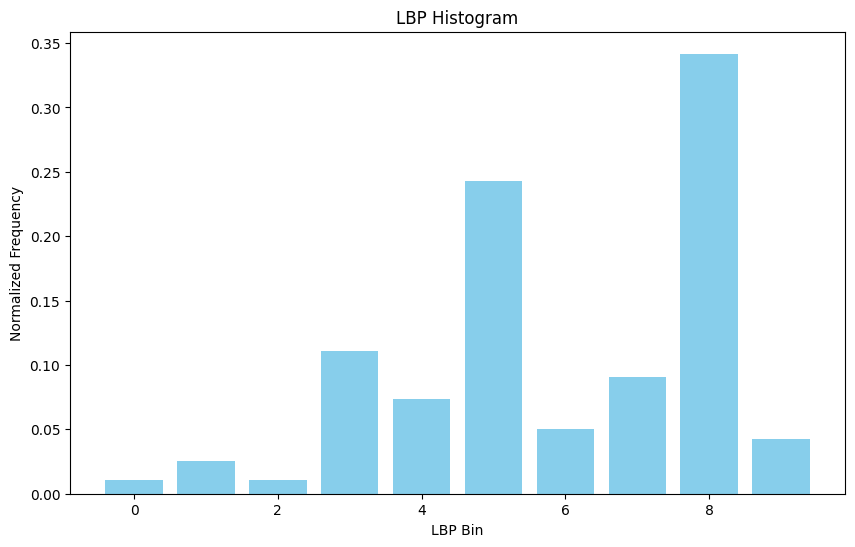

In [97]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(hist_lbp)), hist_lbp, color="skyblue", width=0.8)
plt.title("LBP Histogram")
plt.xlabel("LBP Bin")
plt.ylabel("Normalized Frequency")
plt.show()